# Exercise 3: **Exploring a High-Dimensional Dataset with PCA**


### Basics of Biomedical Data Analysis

**Stephane Deny**: stephane.deny@aalto.fi

**Carlos Sevilla Salcedo**: carlos.sevillasalcedo@aalto.fi

**Hyunkyung Choo**: hyunkyung.choo@aalto.fi

<br></br>
<center><img src = imgs/pic1.png width="40%">
</center>

In neuroscience, experimental technologies allow the simultaneous recording of a large numbers of neurons, but visualising and analysing such high-dimensional neuronal trajectories can be challenging. 

In this problem, we will visualise the activity of a population of neurons by computing and representing means, error bars and correlations, and using PCA to visualize the high-dimensional data in a lower dimensional space.

# 1. Dataset description

The data was collected from a set of experiments in which a **monkey** was instructed to move a **manipulandum**, which is an exoskeleton that fits over the arm and constrains movement to a 2D plane.
Think of the manipulandum as a joystick controlled by the whole arm.
<br></br>
<center>
    <img src=imgs/pic2.png width="25%"><br></br>
<em>Figure 1.</em> Diagram of a manipulandum
</center>
   
The behavioural task was the center-out paradigm pioneered by Georgopoulos
and colleagues (1982). The monkey fist **holds the cursor over the center target for 500 ms**. Then, a peripheral target appears at one of **eight locations arranged in a circle** around the center target.
<br></br>
<center>
    <img src=imgs/pic3.png width="25%"><br></br>
    <em>Figure 2.</em> A monkey operating a manipulandum.
</center>


In our task, there is an **instructed delay**, which means that after the peripheral target appears, the monkey must **wait approximately 1-2 s for a go cue**. After the go cue, the monkey moves its hand to the peripheral target and **holds for 500 ms**, and the trial is completed.
<br></br>
<center>
    <img src=imgs/pic4.png width="25%"><br></br>
    <em>Figure 3.</em> Hand trajectories for a center-out reach task.
</center>

The population of neurons that we will analyse was recorded from **motor (M1) and pre-motor (PMd) brain areas** of a monkey performing this center-out reaching task. These data are adapted from an assignment for Nicho Hatsopoulos Computational Neuroscience course at University of Chicago.

<br></br>
<center>
    <img src=imgs/pic5.png width="25%"><br></br>
    <em>Figure 4.</em> The dorsal premotor cortex (PMd) is involved in selecting motor programs to prepare motor actions. The primary motor cortex (M1) is involved in executing these motor programs (source: https://www.jneurosci.org/content/26/24/6397).
</center>

# 1.1. Data loading

The data with the neural activity is stored in `HatsopoulosReachTask.mat`. The next code cell loads this file with the following variables:
- `numNeurons`, `numTimebins`, `numTrials`: number of neurons, number of time bins, and number of trials
- `firingRate` (`numNeurons x numTimebins x numTrials`): 3-D tensor containing the firing rate of each neuron, in each time bin, on each trial.
- `dt`: length of each time bin in seconds.
- `cueTime`, `goTime`: time of the instruction cue and the go signal in seconds.
- `direction` (`1 x numTrials`): the direction of the reach (takes values from 1-8, starting from 0º, then 45º, on to 315º).
- `brainRegion` (`1 x numNeurons`): either *'M1'* (motor area) or *'PMd'* (pre-motor area).

In [1]:
### Load required python libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
%matplotlib inline
import seaborn as sns
from matplotlib import colors
import scipy.stats
sns.set(rc={"axes.facecolor":"#FAEBD7" , "figure.facecolor":"#FFEFDB"})

#We first load the .mat file
data = scipy.io.loadmat('HatsopoulosReachTask.mat')
#Then, we store the features in dictionary `data` in their corresponding variables
direction = np.squeeze(np.array(data['direction']))
firingRate = np.squeeze(np.array(data['firingRate']))
brainRegion = np.squeeze(data['brainRegion'])
goTime = np.squeeze(data['goTime'])
cueTime = float(np.squeeze(data['cueTime']))
dt = float(np.squeeze(data['dt']))
numNeurons = int(data['numNeurons'])
numTimebins = int(data['numTimebins'])
numTrials = int(data['numTrials'])

print(firingRate.shape)

(143, 30, 158)


# 2. Visualising the temporal traces of average neural activity


We start by visualising the temporal traces of average neural activity over time for the different reach directions. The average is computed over the population of neurons for each brain region (*'PMd'* and *'M1'*).

> **Question:** Plot the **mean activity** over all neurons for each of the **8 reach directions**, as a function of time (i.e. temporal traces). Do this in two figures, one for **each brain region** (*'PMd'* and *'M1'*). Add **x-labels** (in seconds), **y-labels** (in firing rate per second), and **legends** to the plots. Plot the **95% confidence interval** around these means as shaded error bars. Represent the **cue time** as a vertical bar. Plot curves with `linewidth = 2`.

(65, 30, 158)


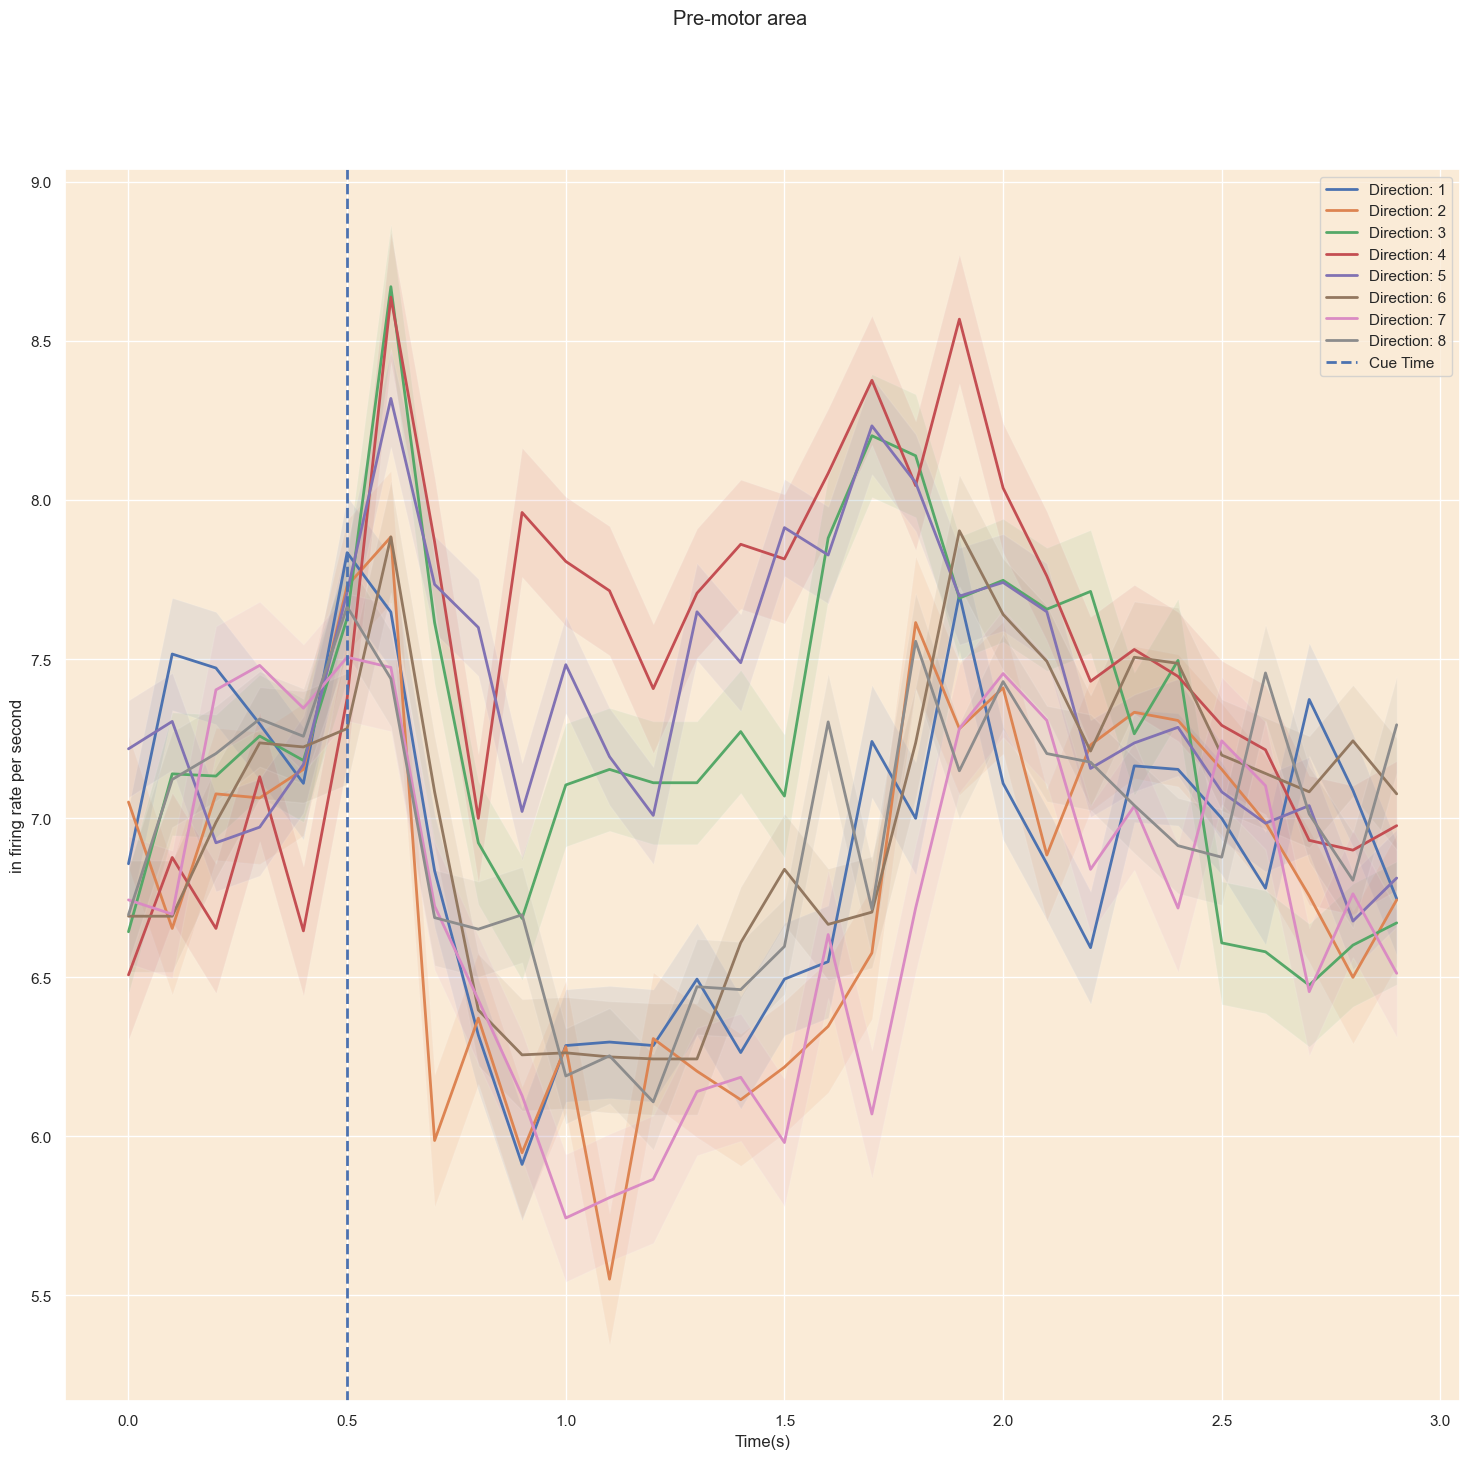

In [2]:
#CODE YOUR SOLUTION HERE

t = np.arange(0,dt*30,dt)
#Angle labels for the plot legend
angle_str = [str(a) + 'º' for a in np.arange(0,360,45)] 

PMd = firingRate[brainRegion == 'PMd',:,:]
PMd_mean = np.zeros((8,PMd.shape[1]))
print(PMd.shape)



fig, ax = plt.subplots(figsize=(18, 16), facecolor='w', edgecolor='k')
for direction_idx in range(1,9):
    #Plot the mean value
    PMd_mean[direction_idx-1,:] = np.mean(PMd[:,:,direction==direction_idx],axis=(0,2))
    ax.plot(t,PMd_mean[direction_idx-1,:],linewidth = 2,label=f'Direction: {direction_idx}')
    #Plot the confidence interval
    ConfidenceInterval = 2*np.std(PMd_mean[direction_idx-1,:])/np.sqrt(len(PMd_mean[direction_idx-1,:]))
    #ax.fill_between(#<FILL IN>)
    ax.fill_between(t, (PMd_mean[direction_idx-1,:]-ConfidenceInterval), 
                    (PMd_mean[direction_idx-1,:]+ConfidenceInterval), alpha=.1)
ax.axvline(x=cueTime,label='Cue Time',linewidth=2,linestyle='--')
ax.set_ylabel("in firing rate per second")
ax.set_xlabel("Time(s)")
plt.legend()
plt.suptitle('Pre-motor area')
plt.show()

(78, 30, 158)


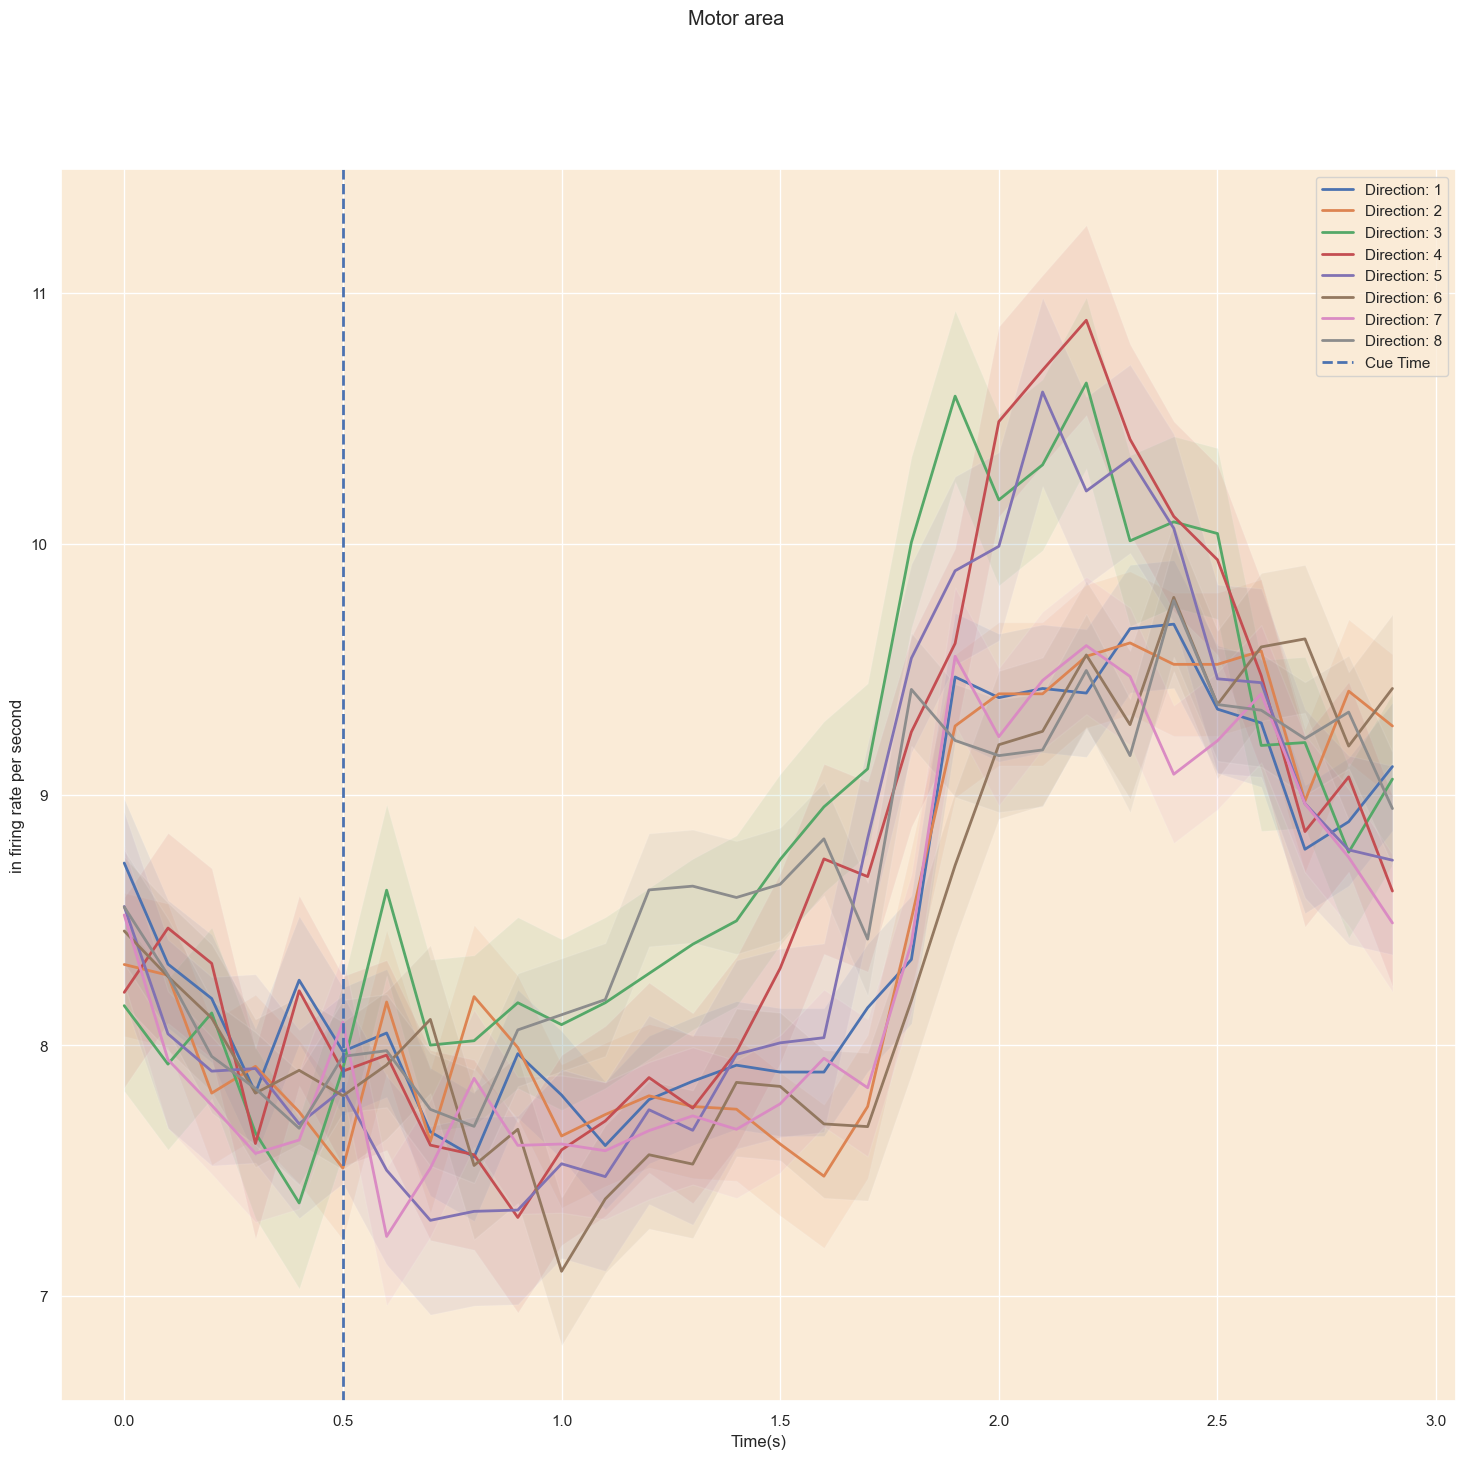

In [3]:
M1 = firingRate[brainRegion != 'PMd',:,:]
M1_mean = np.zeros((8,M1.shape[1]))
print(M1.shape)

fig, ax = plt.subplots(figsize=(18, 16), facecolor='w', edgecolor='k')
for direction_idx in range(1,9):
    #Plot the mean value
    M1_mean[direction_idx-1,:] = np.mean(M1[:,:,direction==direction_idx],axis=(0,2))
    ax.plot(t,M1_mean[direction_idx-1,:],linewidth = 2,label=f'Direction: {direction_idx}')
    #Plot the confidence interval
    ConfidenceInterval = 2*np.std(M1_mean[direction_idx-1,:])/np.sqrt(len(M1_mean[direction_idx-1,:]))
    #ax.fill_between(#<FILL IN>)
    ax.fill_between(t, (M1_mean[direction_idx-1,:]-ConfidenceInterval), 
                    (M1_mean[direction_idx-1,:]+ConfidenceInterval), alpha=.1)
ax.axvline(x=cueTime,label='Cue Time',linewidth=2,linestyle='--')
ax.set_ylabel("in firing rate per second")
ax.set_xlabel("Time(s)")
plt.legend()
plt.suptitle('Motor area')
plt.show()

> **Question:** Do you observe significant differences in neural activities between the different reach directions? 

When analyzing the neural activity in the 'PMd' region, we can identify a noticeable common pattern. Specifically, for time intervals $t < 0.5$ and $t > 2.0$, which correspond to the initial and final phases of the temporal traces, we observe a common trend. During these time intervals, the neural activity across different reach directions exhibits similarities, suggesting a consistent neural response.
However, within the time interval $0.5 < t < 2.0$, a more intricate picture emerges. Here, we can distinguish two distinct groups of reach directions. Directions 3, 4, and 5 significantly diverge from the others, displaying higher mean activity values. This divergence might be attributed to the specific nature of these reach directions. It's plausible that in these cases, the movement tasks involve actions related to shoulder movements, which lead to the observed variation in neural activity.

In the 'M1' region, we observe a distinct pattern in neural activity. There is a shared trend characterized by peaks occurring between $2$ and $2.5$ seconds. This specific temporal range appears to be associated with a pronounced neural response. These peaks may correspond to critical time points during the task, suggesting that 'M1' is particularly active during these phases

# 3. Studying the correlations beween temporal traces of neural activities

In the previous section, we have visualised the temporal traces of neural activity for the different reach directions. Here, we study how these temporal traces correlate with each other across the different reach directions.

> **Question:** Compute the Pearson correlation coefficient between the temporal traces of neural activity--averaged over neurons--for each pair of reach directions, and represent these coefficients in a 8x8 heatmap, representing all correlations between the 8 reach directions. Do it separately for the premotor region (PMd) and the motor region (M1). Specify the range of the colorbar to be between -1 and 1 and use the 'seismic' colormap.

**Note:** Compute the correlation coefficient yourself using this equation:
$$R = \frac{\sum_{i = 1}^N (x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\sum_i (x_i - \mu_x)^2}\sqrt{\sum_i (y_i - \mu_y)^2}}$$

In [28]:
#CODE YOUR SOLUTION HERE

def correlation(data1, data2):
    N1 = len(data1)

    if N1 != len(data2):
        return None

    centered_x = data1 - np.mean(data1)
    centered_y = data2 - np.mean(data2)
    
    norm_x = np.linalg.norm(centered_x)
    norm_y = np.linalg.norm(centered_y)
    
    #avoiding 0 division
    if norm_x == 0 or norm_y == 0:
        return 0

    correlation = np.dot(centered_x, centered_y) / (np.linalg.norm(centered_x) * np.linalg.norm(centered_y))

    return correlation

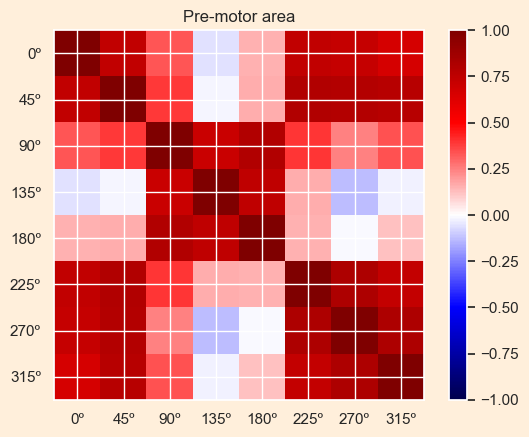

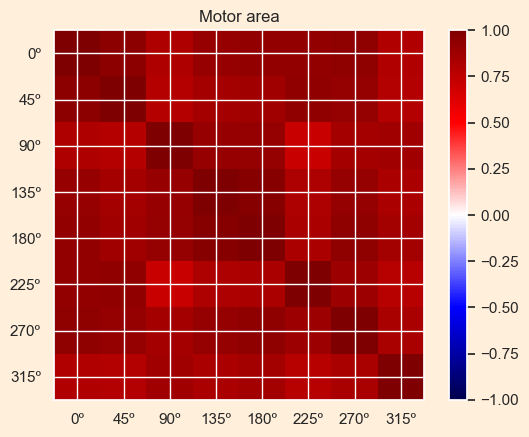

In [29]:
# Compute the correlation matrix for 'Pre-motor area' (PMd)
correlation_matrix_pmd = np.zeros((8, 8))

for i in range(8):
    for j in range(8):
        correlation_matrix_pmd[i, j] = correlation(PMd_mean[i, :], PMd_mean[j, :])

# Plot the correlation matrix for 'Pre-motor area'
plt.imshow(correlation_matrix_pmd, cmap='seismic', vmin=-1, vmax=1)
plt.xticks(np.arange(8), angle_str)
plt.yticks(np.arange(8), angle_str)
plt.colorbar()
plt.title('Pre-motor area')
plt.show()

# Compute the correlation matrix for 'Motor area' (M1)
correlation_matrix_m1 = np.zeros((8, 8))

for i in range(8):
    for j in range(8):
        correlation_matrix_m1[i, j] = correlation(M1_mean[i, :], M1_mean[j, :])

# Plot the correlation matrix for 'Motor area'
plt.imshow(correlation_matrix_m1, cmap='seismic', vmin=-1, vmax=1)
plt.xticks(np.arange(8), angle_str)
plt.yticks(np.arange(8), angle_str)
plt.colorbar()
plt.title('Motor area')
plt.show()

> **Question:** Which reach directions exhibit high correlations in neural activity for each brain region? Are these observations compatible with the visualisation of temporal traces in the previous section?

In the 'Pre Motor Area' (PMd), we observe the following Pearson correlation coefficients between reach directions:

    1. Directions 6 and 7 also exhibit a high correlation coefficient of around 0.82(just print the matrix and you'll see).
    2. Directions 1 and 2 have a high correlation coefficient of approximately 0.74.
    
On average, we note a relatively high level of correlation among most reach directions, with one notable exception: directions 3, 4, and 5. Specifically, when examining pairs of directions where both i and j are not equal to 3, 4, or 5, we observe consistently high correlations. In contrast, when one direction is among 3, 4, or 5 and the other is not, we notice relatively lower correlations (though not negligible). Similarly, when both directions are among 3, 4, or 5, we find a strong level of correlations.

This pattern is in line with our earlier findings, where directions 3, 4, and 5 displayed common trends that diverged from the other directions, particularly within the time interval of 2 < t < 2.5 seconds. This indicates that there is a distinct neural response pattern for these specific reach directions during that time frame."

This revised explanation provides a more detailed and precise account of the correlations and their relation to the visualized temporal traces in the 'PMd' region.

In the 'Motor Area' (M1), we find the following Pearson correlation coefficients between reach directions:

    1.Directions 1 and 2 have a very high correlation coefficient of approximately 0.94.
    2.Directions 4 and 5 also show a high correlation coefficient of around 0.96.
    
These observations indicate that in the M1, the neural activity for these pairs of directions is highly positively correlated. This is consistent with the visualizations of temporal traces, which also show similar trends in the neural activity for these pairs of reach directions. However, we can see for this area an high correlations between all pairs of directions. The same statement of the previous point sill hold: as we can see from the plot above, all direction have a very similar trend.

# 4. Visualising neural activity trajectories in a reduced-dimensional space with PCA 

In the previous section, we have visualized neural activity **averaged over all neurons** in a given brain region. Such an average gives us a limited view of the structure of neural activity of the population of neurons. In this section, instead of computing such average, we will visualize the neural activity **in a reduced-dimensional space**, using PCA. This visualisation will give us a more complete picture of neural activity structure, and of the differences that might exist in neural activity for the different reach directions.

> **Question:** Make a **3D array** that contains the **trial-averaged** activity trajectory of each neuron for each of the 8 reach directions (this array should be `numNeurons x 8 x numTimebins`). 

In [30]:
#CODE YOUR SOLUTION HERE
print('Shape of firingRate:')
print(firingRate.shape)

frt = np.zeros([numNeurons, 8, numTimebins])

for direction_idx in range(1, 9):
    # Select trials corresponding to the current reach direction
    fr_dir = firingRate[:, :, direction == direction_idx]

    # Calculate the trial-averaged activity trajectory for each neuron
    fr_dir_mean = np.mean(fr_dir, axis=2)

    # Store the trial-averaged activity trajectory in the 3D array
    frt[:, direction_idx - 1, :] = fr_dir_mean

print('Shape of firingRate after averaging:')
print(frt.shape)

Shape of firingRate:
(143, 30, 158)
Shape of firingRate after averaging:
(143, 8, 30)


PCA is a 2D matrix decomposition, and there are several ways in which we can construct a 2D data matrix from the 3D raw data, each of which can be useful for different types of analysis. 

> **Question:** Construct a **2D data matrix** by concatenating the elements of the last dimension (i.e. the reach directions) to yield a 2D matrix of dimension: `numNeurons x (8 * numTimebins)`.

**Tip**: You might want to use function `reshape` from numpy.

In [31]:
#CODE YOUR SOLUTION HERE

frt = frt.reshape(numNeurons, -1)
print('Shape of firingRate after averaging and reshaping:')
print(frt.shape)

Shape of firingRate after averaging and reshaping:
(143, 240)


> **Question:** What might be the goal of averaging and concatenating the data in this way?

Averaging: Averaging smooths out variations and also is helpful in order to reduce the effect of the noise if this noise is not to high.

Concatenation: This transformation simplifies the data, making it easier to identify patterns, in fact the reduction of complexity allow to create meaningful visual representations.

To sum up, this data processing assists in identifying characteristics, detecting regularities, simplifying the data, and generating visualizations for a better grasp of how the neurons respond to different reaching directions

One of the most common techniques for data preprocessing is data scaling. This helps giving all variables the same weight and can help the model to not be biased.

> **Question:** Z-score your 2D data matrix by subtracting the means off each row, and by dividing by the standard deviation of each row. In this case, we are removing the mean firing rate from each neuron and normalizing its firing rate.

**Note**: When you divide two numbers, you need to be careful of not dividing by 0, as it would yield a *NaN* value. You can use the function given bewlow to replace any possible *NaN*'s by 0's.

In [32]:
def safe_divide(numerator, denominator, replace=0):
    
    result = np.divide(numerator, denominator, out=np.full_like(numerator, replace), where=(denominator != 0))
    return result
    #sobstituting for a big number has more sense since 1/x->infnity for x->0+



# Calculate the mean and standard deviation of each row (axis=1)
row_means = np.mean(frt, axis=1)
row_std = np.std(frt, axis=1)

# Use the safe_divide function to perform Z-scoring
z_scored_data = safe_divide(frt - row_means[:, np.newaxis], row_std[:, np.newaxis],replace=0)
print(z_scored_data)

[[ 0.03463024  0.42481083 -0.16046006 ...  0.02315434  1.46911771
   0.18381694]
 [-0.34262502 -0.04634388 -0.26855474 ... -0.60404957 -0.66504863
  -0.29905427]
 [-0.37535772 -0.37535772 -0.37535772 ... -0.93103193 -0.47341787
   0.44181023]
 ...
 [ 0.62555062  0.16787675 -0.51863404 ...  1.95818922  0.45055767
   1.76973528]
 [-0.42234889 -0.42234889 -0.42234889 ... -0.56383438  3.39775932
   0.75669685]
 [ 0.44607019 -0.44875249 -1.1198695  ...  0.53818429  0.35395609
  -0.56718491]]


> **Question:** Display your centered 2D data matrix as a heatmap (e.g., by using the python command imshow).

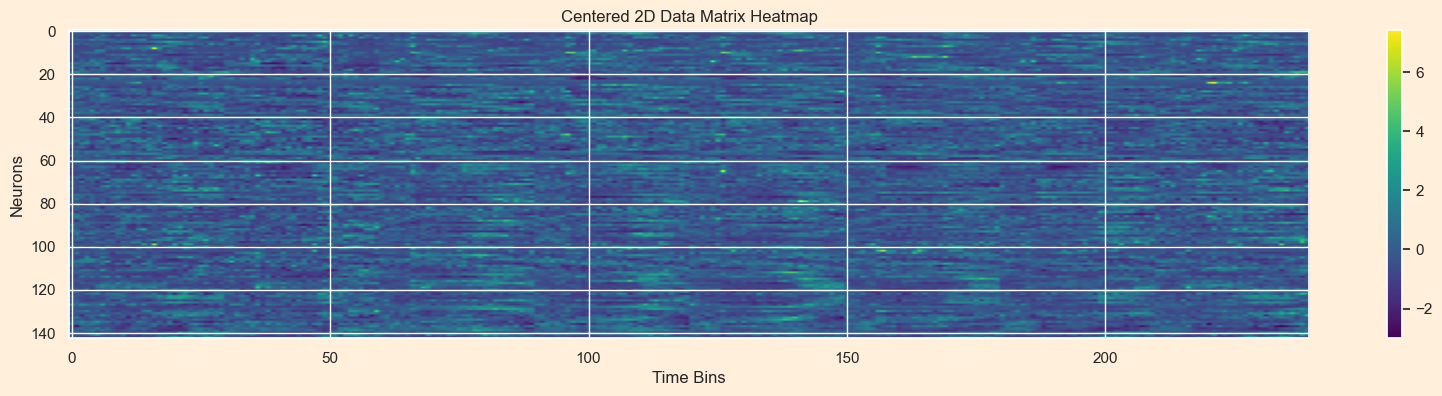

In [33]:
#CODE YOUR SOLUTION HERE

%matplotlib inline
plt.figure(figsize =(20,4))

plt.imshow(z_scored_data, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Centered 2D Data Matrix Heatmap')
plt.xlabel('Time Bins')
plt.ylabel('Neurons')
plt.show()

> **Question:** Describe any structure you see in this data.

The peaks of brightness in the central time bins (between 50 and 150 and alo a peak from 200 to 240) may indicate a significant increase in neural activity during those periods. 

The previously mentioned peaks of brightness involving neurons between 60 and 140 may suggest that this range of neurons exhibits more dynamic and responsive activity, potentially in response to specific stimuli or conditions, in contrast to the more uniformly active neurons in the surrounding range.

The observed uniformity in brightness over time for neurons from 0 to 60 may indicate a relatively stable and consistent neural response pattern in this specific range of neurons. This could be due to these neurons having a similar functional role or being influenced by common factors, resulting in a more consistent activity profile across time bins. Further analysis and experimentation would be needed to understand the underlying reasons for this pattern.

#YOUR ANSWER HERE

Now that we have centered the data and that we have obtained a 2D matrix, we can calculate and visualise the correlation matrix of the data.

> **Question:** Calculate the correlation matrix between neurons and plot it using 'imshow'. 

**Tip**: You can check that the corrrelation matrix is correctly calculated, by checking that is has dimension `numNeurons x numNeurons` and that its diagonal is filled with 1s.

Shape of the correlation matrix: (143, 143)


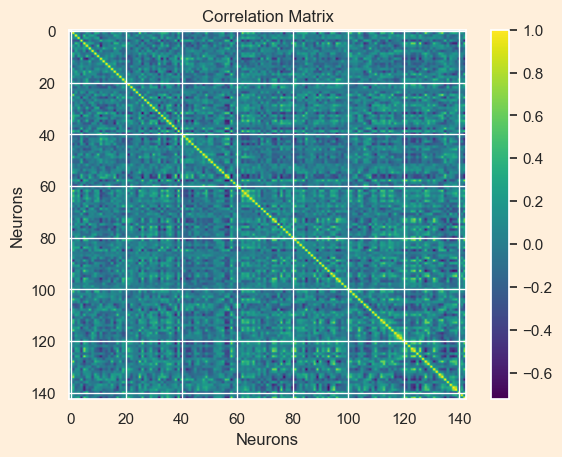

In [34]:
#CODE YOUR SOLUTION HERE

# Initialize a correlation matrix with zeros
numNeurons = z_scored_data.shape[0]
Corr = np.zeros((numNeurons, numNeurons))

# Calculate the correlation matrix using the 'correlation' function
for i in range(numNeurons):
    for j in range(numNeurons):
        Corr[i, j] = correlation(z_scored_data[i, :], z_scored_data[j, :])

# Fill the diagonal with 1s
np.fill_diagonal(Corr, 1)

# Check the shape of the correlation matrix
print("Shape of the correlation matrix:", Corr.shape)

# Plot the correlation matrix
plt.figure()
plt.imshow(Corr, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Correlation Matrix")
plt.xlabel("Neurons")
plt.ylabel("Neurons")
plt.show()

We have seen that the neural activity, averaged over neurons for the different reach directions, is not always distinct for the different reach directions. Now let's see if we can distinguish between the different reach directions when we represent neural activity in PCA space.

> **Question:** Perform an eigendecomposition on the covariance matrix using the python `np.linalg.eig` function and sort the eigenvalues and the eigenvectors.

**Note**: `np.linalg.eig` returns two values. The first one is a 1D array with the eigenvalues and the second one is a 2D matrix with the eigenvectors.

**Tip**: You might want to use `np.sort` and/or `np.argsort` to obtain the sorted version of an array or the corresponding indexes.

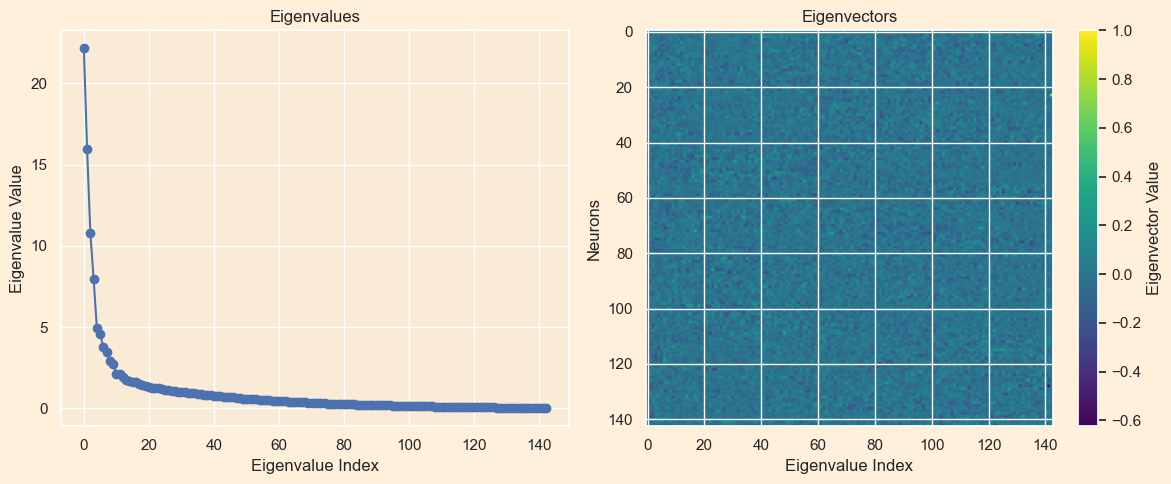

In [37]:
# Covariance matrix
cov_matrix = np.cov(z_scored_data)

# decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sorting
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

%matplotlib inline
# Create a single plot with two subfigures
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Fig 1
axs[0].plot(sorted_eigenvalues, marker='o', linestyle='-')
axs[0].set_title("Eigenvalues")
axs[0].set_xlabel("Eigenvalue Index")
axs[0].set_ylabel("Eigenvalue Value")

# fig2
im = axs[1].imshow(sorted_eigenvectors, cmap='viridis', aspect='auto')
axs[1].set_title("Eigenvectors")
axs[1].set_xlabel("Eigenvalue Index")
axs[1].set_ylabel("Neurons")

# Add a colorbar for the second subfigure
cbar = fig.colorbar(im, ax=axs[1])
cbar.set_label("Eigenvector Value")

plt.tight_layout()
plt.show()

> **Question:** Plot the sorted eigenvalues in one figure and the percentage of explained variance as we use more sorted eigenvalues in another figure. Comment on the underlying dimensionality of the data.

**Tip:** `np.cumsum` calculates the accumulated sum of all elements in an array. For example, if you pass `[1,2,3,4,5]`, the function will return `[1,3,6,10,15]`.

In [ ]:
#CODE YOUR SOLUTION HERE

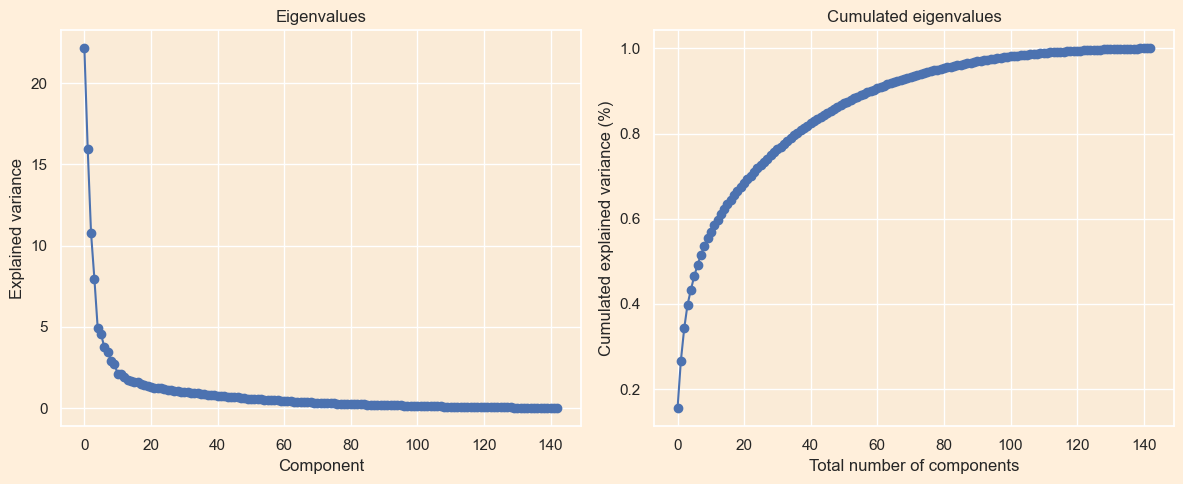

In [40]:
# Calculate the percentage of explained variance
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))


axs[0].plot(sorted_eigenvalues, '-o')
axs[0].set_xlabel('Component')
axs[0].set_ylabel('Explained variance')
axs[0].set_title('Eigenvalues')



axs[1].plot(cumulative_explained_variance, '-o')
axs[1].set_xlabel('Total number of components')
axs[1].set_ylabel('Cumulated explained variance (%)')
axs[1].set_title('Cumulated eigenvalues')

plt.tight_layout()
plt.show()

In [41]:
target_variance = 0.95
num_components_95 = np.argmax(cumulative_explained_variance >= target_variance) + 1

print(f"Number of components needed to capture 95% of the variance: {num_components_95}")

Number of components needed to capture 95% of the variance: 79


> **Question:** How many eigenvectors are needed to capture 95% of the variance?

We need al least 79 eigenvectors, as you can see above.

We started out with eight high-dimensional neural trajectories, one for each reach direction. Now, we can use PCA to visualize our data in 2 dimensions to obtain better insights about the data.

> **Question:** Project the data onto the first 3 principal components to obtain a representation of the neural trajectories in just 3 variables. Your new matrix should be `(numTimebins * 8) x 3`, which you should reshape into a `numTimebins x 8 x 3` array.

**Tip:** There are several functions to calculate a matricial product, e.g., `np.dot`, `np.matmul` or using `@`. 

In [43]:
# Number of principal components to retain
num_components = 3

# Project the data onto the first 3 principal components
projected_data = z_scored_data.T @ sorted_eigenvectors[:, :num_components]

# Reshape the projected data into a 3D array
projected_data = projected_data.reshape(numTimebins, 8, num_components)

> **Question:** Plot all 8 trajectories on the same 3D plot, each in a different color.

In [73]:
#CODE YOUR SOLUTION HERE

%matplotlib qt  

angle_str = [str(a) + 'º' for a in np.arange(0, 360, 45)]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(8):
    ax.plot(
        projected_data[:, i, 0],  # First PC
        projected_data[:, i, 1],  # Second PC
        projected_data[:, i, 2],  # Third PC
        label=f'Direction {i+1}'
    )

plt.xlabel('First PC')
plt.ylabel('Second PC')
ax.set_zlabel('Third PC')  
plt.legend()

> **Question:** Comment on the structure of the trajectories. Is there any evidence that the population of neurons reflects the different reach directions? What can you say about neural trajectories at the start and end of reach trials in different directions? At what time in the trial are the trajectories maximally different?


The trajectories of neural activity exhibit distinct patterns:

All trajectories display zigzag movements that converge towards a central area around the point (-6.7, -11, 6.4).

The first trajectory initially exhibits wide fluctuations with values ranging from -10 to 10 for x, y, and z coordinates. It then narrows down and converges towards a central point, approximately at (-6.7, -11, 6.4). This suggests a tendency for neural activity to converge during the reach.

The second trajectory also shows wide movements but appears closed, indicating a potential return to the starting point.

The third trajectory is similar to the second but remains open with a clear starting point. While no distinct patterns are evident at this point, significant fluctuations occur primarily along the second principal component (PCA).

Trajectories four and five resemble the third one, with less chaotic fluctuations.

The similarities between the third, fourth, and fifth trajectories align with the initial patterns observed.

The fifth trajectory exhibits a long peak along the second PCA axis but otherwise behaves similarly to the others. However, while the other trajectories cover a larger area in the plot, the fifth trajectory appears to converge more towards a fixed central zone.

The sixth trajectory shares similarities with the fifth but appears even more concentrated and compact.

The seventh trajectory is akin to the sixth but even more compact, with more pronounced direction changes near the center.

The eighth trajectory strongly resembles the third, and the same considerations about increased direction changes near the center apply.

These observations suggest that as the reach trials progress, neural trajectories become more focused and converge towards a central region, potentially reflecting a more refined and precise neural response during the later stages of the trials. The trajectories show significant changes, particularly near the central region, indicating a shift in neural activity.
